In [1]:
import pymove as pm
import pandas as pd
import numpy as np
import utilities.constants as const
from core.TrajectoryDF import NumPandasTraj as TrajDF
from preprocessing.filters import Filters as filt
from features.spatial_features import SpatialFeatures as spatial
from utilities.conversions import Conversions as con
from preprocessing.interpolation import Interpolate as ip

In [2]:
atlantic = pd.read_csv('./data/atlantic.csv')
atlantic = con.convert_directions_to_degree_lat_lon(atlantic, 'Latitude',"Longitude")
def convert_to_datetime(row):
        this_date = '{}-{}-{}'.format(str(row['Date'])[0:4], str(row['Date'])[4:6], str(row['Date'])[6:])
        this_time = '{:02d}:{:02d}:00'.format(int(row['Time']/100), int(str(row['Time'])[-2:]))
        return '{} {}'.format(this_date, this_time)
atlantic['DateTime'] = atlantic.apply(convert_to_datetime, axis=1)

gulls = pd.read_csv('./data/gulls.csv')

geolife = pd.read_csv('./data/geolife_sample.csv')

In [3]:
%%time

np_atlantic = TrajDF(atlantic,
                         latitude='Latitude',
                         longitude='Longitude',
                         datetime='DateTime',
                         traj_id='ID',
                         rest_of_columns=[])

np_gulls = TrajDF(gulls,
                 latitude='location-lat',
                 longitude='location-long',
                 datetime='timestamp',
                 traj_id='tag-local-identifier',
                 rest_of_columns=[])

np_geolife = TrajDF(geolife,latitude='lat',
                     longitude='lon',
                     datetime='datetime',
                     traj_id='id')


CPU times: user 1.01 s, sys: 36 ms, total: 1.05 s
Wall time: 1.04 s


In [4]:
%%time

np_geolife = spatial.create_distance_between_consecutive_column(np_geolife)
interpolated_geolife = ip.interpolate_position(np_geolife, 30)

2
CPU times: user 1.42 s, sys: 96.6 ms, total: 1.52 s
Wall time: 1min 27s


In [5]:
print(f"Length of original geolife Dataframe: {len(np_geolife)}")
print(f"Length of interpolated geolife Dataframe: {len(interpolated_geolife)}")

Length of original geolife Dataframe: 217653
Length of interpolated geolife Dataframe: 222462


In [6]:
%%time

np_atlantic = spatial.create_distance_between_consecutive_column(np_atlantic)
interpolated_atlantic = ip.interpolate_position(np_atlantic, 250000)

19
CPU times: user 1.21 s, sys: 694 ms, total: 1.91 s
Wall time: 10.3 s


In [7]:
print(f"Length of original atlantic Dataframe: {len(np_atlantic)}")
print(f"Length of interpolated atlantic Dataframe: {len(interpolated_atlantic)}")

Length of original atlantic Dataframe: 49105
Length of interpolated atlantic Dataframe: 52837


In [8]:
interpolated_geolife.head(10)

lat         lon  Distance_prev_to_curr
traj_id DateTime                                                             
1       2008-10-23 05:53:11.000  39.984224  116.319402                    NaN
        2008-10-23 05:53:16.000  39.984211  116.319389               1.821083
        2008-10-23 05:53:21.000  39.984217  116.319422               2.889671
        2008-10-23 05:53:23.000  39.984710  116.319865              66.555997
        2008-10-23 05:53:23.500  39.985184  116.320317              65.290735
        2008-10-23 05:53:28.000  39.984674  116.319810              71.301809
        2008-10-23 05:53:33.000  39.984623  116.319773               6.488225
        2008-10-23 05:53:38.000  39.984606  116.319732               3.971848
        2008-10-23 05:53:43.000  39.984555  116.319728               5.681172
        2008-10-23 05:53:48.000  39.984579  116.319769               4.395924

In [9]:
interpolated_atlantic.head(10)

lat   lon  Distance_prev_to_curr
traj_id  DateTime                                              
AL011851 1851-06-25 00:00:00  28.0 -94.8                    NaN
         1851-06-25 06:00:00  28.0 -95.4           58907.516366
         1851-06-25 12:00:00  28.0 -96.0           58907.516366
         1851-06-25 18:00:00  28.1 -96.5           50310.976622
         1851-06-25 21:00:00  28.2 -96.8           31444.370265
         1851-06-26 00:00:00  28.2 -97.0           19599.292319
         1851-06-26 06:00:00  28.3 -97.6           59812.944128
         1851-06-26 12:00:00  28.4 -98.3           69397.514092
         1851-06-26 18:00:00  28.6 -98.9           62707.818251
         1851-06-27 00:00:00  29.0 -99.4           65969.297018

In [10]:
%%time

np_gulls = spatial.create_distance_between_consecutive_column(np_gulls)
interpolated_gulls = ip.interpolate_position(np_gulls,
                                             distance_threshold=15000)

12
CPU times: user 849 ms, sys: 258 ms, total: 1.11 s
Wall time: 2min 5s


In [11]:
print(f"Length of original gulls Dataframe: {len(np_gulls)}")
print(f"Length of interpolated gulls Dataframe: {len(interpolated_gulls)}")


Length of original gulls Dataframe: 89869
Length of interpolated gulls Dataframe: 106020


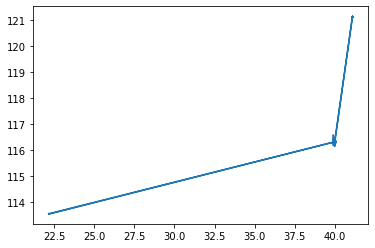

In [12]:
import matplotlib.pyplot as plt

plt.plot(np_geolife[const.LAT], np_geolife[const.LONG])

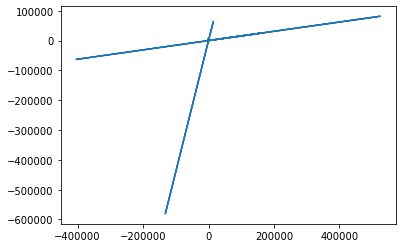

In [13]:
plt.plot(interpolated_geolife[const.LAT], interpolated_geolife[const.LONG])

In [14]:
interpolated_geolife.loc[interpolated_geolife[const.LAT] < 0]


lat            lon  \
traj_id DateTime                                                
1       2008-10-23 19:17:23.500    -216.335893     227.063800   
        2008-11-19 22:12:20.500    -123.731411     225.358334   
5       2008-10-25 10:26:10.500     -11.950233     138.772191   
        2008-10-25 18:29:37.500     -42.942125     144.214176   
        2008-10-30 22:57:35.500      -6.006747     136.395752   
        2008-10-31 15:16:16.500      -7.729500     136.223468   
        2008-11-05 18:19:18.500     -50.316473     154.396374   
        2008-11-06 19:52:42.500     -19.179215     137.875813   
        2008-11-07 19:32:42.500     -16.088638     144.963501   
        2008-11-11 16:24:20.500     -56.155029     162.917977   
        2008-11-12 14:20:25.500     -25.384707     136.932882   
        2008-11-16 20:52:50.500     -27.703838     142.000918   
        2008-11-27 12:07:15.500 -404959.771408  -63161.001693   
        2009-01-17 00:15:54.500    -441.378249    3877.455581   
        2009-01-22 01:18:54.000   -1933.371500    6291.865318   
        2009-02-08 07:04:39.500 -132180.729019 -581313.293305   
        2009-02-24 17:03:09.500     -12.596553     134.508498   
        2009-02-28 17:40:17.000    -166.495230     195.656475   
        2009-03-12 10:20:24.500     -25.022304     142.789650   
        2009-03-12 21:00:26.000     -16.009944     121.653483   
        2009-03-13 08:03:55.000      -9.972206     178.230521   

                                 Distance_prev_to_curr  
traj_id DateTime                                        
1       2008-10-23 19:17:23.500           7.069049e+06  
        2008-11-19 22:12:20.500           1.260085e+07  
5       2008-10-25 10:26:10.500           6.281782e+06  
        2008-10-25 18:29:37.500           9.640753e+06  
        2008-10-30 22:57:35.500           5.514929e+06  
        2008-10-31 15:16:16.500           5.682338e+06  
        2008-11-05 18:19:18.500           1.070838e+07  
        2008-11-06 19:52:42.500           6.950713e+06  
        2008-11-07 19:32:42.500           6.906876e+06  
        2008-11-11 16:24:20.500           1.155743e+07  
        2008-11-12 14:20:25.500           7.578718e+06  
        2008-11-16 20:52:50.500           7.984470e+06  
        2008-11-27 12:07:15.500           6.746886e+06  
        2009-01-17 00:15:54.500           1.534799e+07  
        2009-01-22 01:18:54.000           1.597294e+07  
        2009-02-08 07:04:39.500           1.174751e+07  
        2009-02-24 17:03:09.500           6.143988e+06  
        2009-02-28 17:40:17.000           1.117709e+07  
        2009-03-12 10:20:24.500           7.733884e+06  
        2009-03-12 21:00:26.000           7.905053e+06  
        2009-03-13 08:03:55.000           1.006816e+07